# Premières découvertes des bases de données sur notre sujet

In [18]:
import pandas as pd
import geopandas as gpd
import matplotlib as plot
import descartes

### Pour avoir les communes de Corse

Là j'ai juste repris le début du TP sur Géopandas, si vous avez une méthode plus simple ou plus "gracieuse", je suis preneuse!

In [19]:
import requests
import tempfile
import zipfile

temporary_location = tempfile.gettempdir()
#Méthodes utilisées dans le TP de géopandas
def download_unzip(url, dirname = tempfile.gettempdir(), destname = "borders"):
  myfile = requests.get(url)
  open(dirname + '/' + destname + '.zip', 'wb').write(myfile.content)
  with zipfile.ZipFile(dirname + '/' + destname + '.zip', 'r') as zip_ref:
      zip_ref.extractall(dirname + '/' + destname)

download_unzip('https://www.data.gouv.fr/fr/datasets/r/07b7c9a2-d1e2-4da6-9f20-01a7b72d4b12')
communes_borders = gpd.read_file(temporary_location + "/borders/communes-20190101.json")

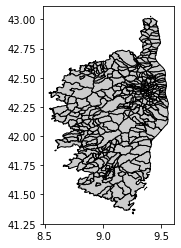

In [9]:
#On index par rapport au numéro des départements
#On ne garde que les deux départements de Corse qui nous intéressent
data_borders = communes_borders.set_index('insee')
data_borders['dep'] = data_borders.index.str[:2]
communes_corses = data_borders.loc[data_borders['dep'].isin(['2A','2B'])].plot(color='0.8', edgecolor='black')
communes_corses

### Des données sur les pistes cyclables

J'ai trouvé les données sur la page https://www.data.gouv.fr/fr/datasets/amenagements-cyclables-en-corse/

In [4]:
pistes_cyclables = gpd.read_file('https://www.data.gouv.fr/fr/datasets/r/7daa40cf-edde-4f64-9963-e3092a2e2b30')

In [5]:
pistes_cyclables.crs

{'init': 'epsg:4326'}

In [15]:
#Pour obtenir le nom de toutes les colonnes du fichier
print(pistes_cyclables.head(0))

Empty GeoDataFrame
Columns: [code_epci, id_iti, name, statut, datesaisie, orig_fid, code_reg, code_com, avancement, length, gestion, revetement, code_dep, nom_commune, sensunique, fictif, propriete, jalon_tour, an_ouvert, jalon_dir, geometry]
Index: []

[0 rows x 21 columns]


In [6]:
pistes_cyclables.head(5)

,code_epci,id_iti,name,statut,datesaisie,orig_fid,code_reg,code_com,avancement,length,...,revetement,code_dep,nom_commune,sensunique,fictif,propriete,jalon_tour,an_ouvert,jalon_dir,geometry
0,242010056,0902*,Traversée piétonne existante,VV,2020-03-16T01:00:00,0,94,2A004,04,0.035090,...,LIS,02A,Ajaccio,None,None,None,None,None,None,"LINESTRING Z (8.73940 41.92683 0.00000, 8.7394..."
1,242010056,None,Canal Gravona - Mezzavia,VV,2020-03-17T01:00:00,0,94,2A209,01,3.435474,...,None,02A,Peri,F,T,None,None,None,None,"LINESTRING Z (8.84222 41.98420 0.00000, 8.8424..."
2,200036499,None,Requalification urbaine Borgo,PCY,2020-03-17T01:00:00,0,94,2B042,01,1.339539,...,LIS,02B,Borgo,T,T,CdC,None,None,None,"LINESTRING Z (9.44078 42.56226 0.00000, 9.4407..."
3,200036499,0901*,Casatorra-Ceppe,RTE,2020-03-17T01:00:00,0,94,2B037,01,1.514585,...,LIS,02B,Biguglia,F,None,None,None,None,None,"LINESTRING Z (9.44331 42.61932 0.00000, 9.4433..."
4,200036499,None,Requalification urbaine RT205,PCY,2020-03-17T01:00:00,0,94,2B148,01,3.495101,...,LIS,02B,Lucciana,T,T,CdC,None,None,None,"LINESTRING Z (9.44036 42.51963 0.00000, 9.4401..."


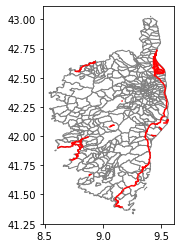

In [7]:
fig, ax = plt.subplots()
data_borders.loc[data_borders['dep'].isin(['2A', '2B'])].plot(ax=ax, color='white', edgecolor='0.5')
pistes_cyclables.plot(ax=ax, color='red', markersize=5)
plt.show()

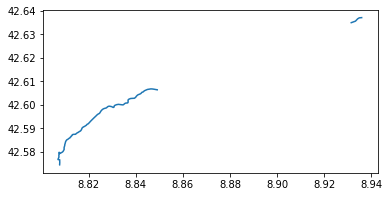

In [16]:
#Etude sur la taille des pistes cyclables
pistes_cyclables.sort_values(by = 'length', ascending = False).head(1).plot()

statut
ASP    AxesSubplot(0.276564,0.125;0.471872x0.755)
BCY    AxesSubplot(0.309362,0.125;0.406277x0.755)
ICA    AxesSubplot(0.259239,0.125;0.506523x0.755)
PCY    AxesSubplot(0.295253,0.125;0.434493x0.755)
RTE    AxesSubplot(0.312448,0.125;0.400105x0.755)
VV     AxesSubplot(0.312848,0.125;0.399304x0.755)
dtype: object

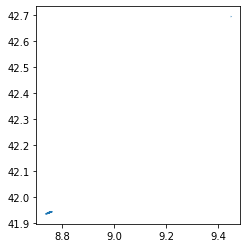

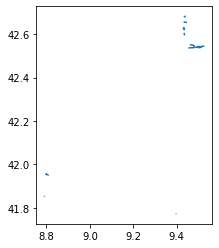

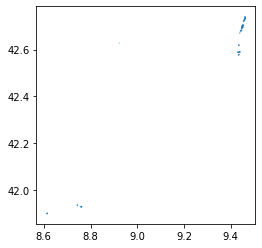

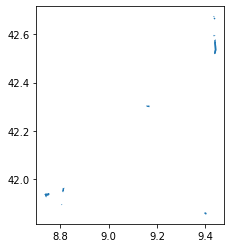

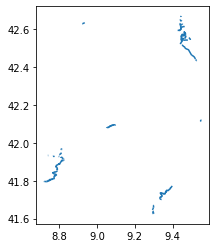

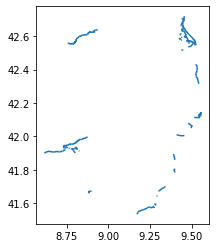

In [17]:
pistes_cyclables.groupby('statut').plot()

La première sortie montre les voies de vélos
Sachant qu'on a :

BCY - Bande Cyclable

ICA - Itinéraire à Circulation Apaisée

ND - Non Défini

PCY - Piste Cyclable

RTE - Route

VV - Voie Verte

Et je n'ai pas trouvé ce que pouvait signifier ASP. 
Toutes les autres voies ne sont donc pas spécifiées.

### Des données sur les transports (aéroports, ports, gares, arrêt de bus)

J'ai trouvé le fichier sur la page https://www.data.gouv.fr/fr/datasets/equipements-de-transport-en-corse/

In [20]:
transports = gpd.read_file('https://www.data.gouv.fr/fr/datasets/r/b818aad7-1965-40df-bf0e-3a84215c4246')

In [21]:
transports.head(100)

,commune,objectid_1,objectid,nom,point_x,point_y,categorie,geometry
0,PORTO-VECCHIO,21,21,Port de Porto Vecchio,9.283457,41.590013,Port de plaisance,POINT (9.28346 41.59001)
1,CARGESE,22,22,Port de Cargese,8.596143,42.131125,Port de plaisance,POINT (8.59614 42.13112)
2,LUCCIANA,26,26,Aeroport Bastia Poretta Luciana,9.481089,42.547133,Aeroport commercial,POINT (9.48109 42.54713)
3,FURIANI,48,48,Furiani,9.440818,42.651373,Gare de chemin de fer,POINT (9.44082 42.65137)
4,CALVI,50,50,Calvi,8.755789,42.564840,Gare de chemin de fer,POINT (8.75579 42.56484)
...,...,...,...,...,...,...,...,...
95,BIGUGLIA,58,58,Biguglia,9.437796,42.615524,Gare de chemin de fer,POINT (9.43780 42.61552)
96,PIANA,156,156,"Piana, place de l'eglise",8.636577,42.238297,Arret de bus extra-urbain,POINT (8.63658 42.23830)
97,CALVI,6,6,Port de Calvi,8.761827,42.566890,Port de commerce,POINT (8.76183 42.56689)
98,VILLE-DI-PIETRABUGNO,13,13,Port Toga,9.454450,42.708972,Port de plaisance,POINT (9.45445 42.70897)


In [47]:
transports.groupby('categorie').count()

,commune,objectid_1,objectid,nom,point_x,point_y,geometry
categorie,,,,,,,
Aeroport commercial,4,4,4,4,4,4,4
Aeroport de tourisme,3,3,3,3,3,3,3
Arret de bus extra-urbain,134,134,134,134,134,134,134
Gare de chemin de fer,36,36,36,36,36,36,36
Gare routiere,2,2,2,2,2,2,2
Port de commerce,7,7,7,7,7,7,7
Port de plaisance,17,17,17,17,17,17,17


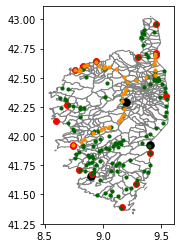

In [58]:
fig, ax = plt.subplots()
data_borders.loc[data_borders['dep'].isin(['2A', '2B'])].plot(ax=ax, color='white', edgecolor='0.5')
transports.loc[transports['categorie'].isin(['Aeroport de tourisme'])].plot(ax = ax, color = 'black', markersize = 55)
transports.loc[transports['categorie'].isin(['Port de plaisance'])].plot(ax = ax, color = 'red', markersize = 35)
transports.loc[transports['categorie'].isin(['Arret de bus extra-urbain'])].plot(ax = ax, color = 'darkgreen', markersize = 10)
transports.loc[transports['categorie'].isin(['Gare de chemin de fer'])].plot(ax = ax, color = 'darkorange', markersize = 10)
plt.show()
#Je pense qu'il doit exister une manière beaucoup plus élégante d'afficher ça, à nous de trouver :)

On voit bien les deux lignes de chemins de fer et les lieux plus desservies par le bus, parce qu'il y a des touristes mais pas de train

Autres bases de données intéressantes : 
Transport  = nombre de voyageurs depuis 2008 en Corse

### Des données sur les localisations des offices de tourisme

Les données viennent du lien : https://www.data.gouv.fr/fr/datasets/annuaire-des-offices-du-tourisme-syndicats-dinitiative-de-corse/

In [59]:
offices_de_tourisme = gpd.read_file('https://www.data.gouv.fr/fr/datasets/r/e9161b9c-90c5-4140-80c0-b577236da15e')

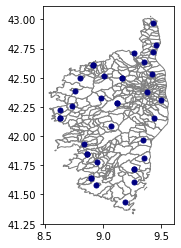

In [63]:
fig, ax = plt.subplots()
data_borders.loc[data_borders['dep'].isin(['2A', '2B'])].plot(ax=ax, color='white', edgecolor='0.5')
offices_de_tourisme.plot(ax = ax, color = 'navy', markersize = 25)
plt.show()

### Des données sur les étabissements touristiques

Les données viennent du lien : https://www.data.gouv.fr/fr/datasets/etablissements-de-loisirs-en-corse-par-categorie/
Le problème avec les deux bases de données suivantes, c'est qu'elles sont aussi bien pour les habitants que pour les touristes.

In [66]:
etablissements_touristiques = gpd.read_file('https://www.data.gouv.fr/fr/datasets/r/a6b4e412-2133-4ccd-859a-cb61b5590467')

In [68]:
etablissements_touristiques.head(10)

,ville,categorie,enseigne,secteur,lieu,cp,geometry
0,Olmeto - Ulmetu,Equipements de Bien-Etre : Eau et Santé,SPA DU MARINCA,Sartenais-Valinco-Taravo,20113 Olmeto - Ulmetu,20113,POINT (8.90501 41.71221)
1,Bonifacio - Bunifaziu,Activités de loisirs,SUD NAUTIQUE EVASION,Sud Corse,20169 Bonifacio - Bunifaziu,20169,POINT (9.18562 41.43557)
2,Cargèse - Carghjese,Activités de loisirs,CROISIERES GRAND BLEU,Ouest Corsica,20130 Cargèse - Carghjese,20130,POINT (8.62641 42.15449)
3,Ghisoni,Equipements de loisirs,STATION DE SKI GHISONI CAPANELLE,Corse Orientale,20227 Ghisoni,20227,POINT (9.21042 42.09076)
4,Solenzara,Equipements de loisirs,FOREST PARC,Corse Orientale,20145 Solenzara,20145,POINT (9.35249 41.81362)
5,Ajaccio - Aiacciu,Equipements de loisirs,TENNIS CLUB D'AJACCIO,Pays Ajaccien,20000 Ajaccio - Aiacciu,20000,POINT (8.70149 41.93487)
6,Speloncato,Activités de loisirs,LA MONTAGNE DES ORGUES,Balagne,20226 Speloncato,20226,POINT (9.04615 42.60783)
7,Ajaccio - Aiacciu,Activités de loisirs,LE LUCIANU,Pays Ajaccien,20000 Ajaccio - Aiacciu,20000,POINT (8.70149 41.93487)
8,Porto - Portu,Ports de plaisance,PORT DE PORTO,Ouest Corsica,20150 Porto - Portu,20150,POINT (8.73361 42.25521)
9,Bastia,Activités de loisirs,LES LEGENDINES,Pays Bastiais,20200 Bastia,20200,POINT (9.42659 42.71698)


In [69]:
etablissements_touristiques.groupby('categorie').count()

,ville,enseigne,secteur,lieu,cp,geometry
categorie,,,,,,
Activités de loisirs,125,125,125,125,125,125
Equipements de Bien-Etre : Eau et Santé,10,10,10,10,10,10
Equipements de loisirs,72,72,72,72,72,70
Ports de plaisance,25,25,25,25,25,25


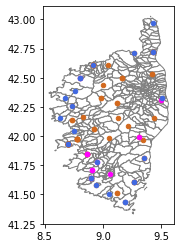

In [79]:
fig, ax = plt.subplots()
data_borders.loc[data_borders['dep'].isin(['2A', '2B'])].plot(ax=ax, color='white', edgecolor='0.5')
etablissements_touristiques.loc[etablissements_touristiques['categorie'].isin(['Activités de loisir', 'Equipements de loisirs'])].plot(ax = ax, color = 'chocolate', markersize = 20)
etablissements_touristiques.loc[etablissements_touristiques['categorie'].isin(['Equipements de Bien-Etre : Eau et Santé'])].plot(ax = ax, color = 'magenta', markersize = 20)
etablissements_touristiques.loc[etablissements_touristiques['categorie'].isin(['Ports de plaisance'])].plot(ax = ax, color = 'royalblue', markersize = 20)
plt.show()

D'autres données à partir de ce lien : 
A nous de vérifier si les données sont les mêmes ou se complètent

In [80]:
etablissements_touristiques2 = gpd.read_file('https://www.data.gouv.fr/fr/datasets/r/d0f439d6-33f9-4b71-88ca-593e42911f72')

In [82]:
etablissements_touristiques2.sample(10)

,ville,categorie,secteur,enseigne,lieu,cp,geometry
332,cio,Nautisme,Pays Ajaccien,PESCATOURISME,Ajaccio,Aja,None
15,Chisa,Activités de pleine nature,Corse Orientale,VIA FERRATA DE CHISA,20240 Chisa,20240,POINT (9.34453 41.96913)
264,Olmeto,Nautisme,Sartenais-Valinco-Taravo,ABBARTELLO KAYAK,20113 Olmeto,20113,POINT (8.90501 41.71221)
433,Ghisonaccia,Activités de pleine nature,Corse Orientale,SOCIETE DE CHASSE DU DOMAINE DE PINIA,20240 Ghisonaccia,20240,POINT (9.34453 41.96913)
106,Porticcio,Nautisme,Pays Ajaccien,YACHTING CLUB,20166 Porticcio,20166,POINT (8.85890 41.84376)
178,Quenza,Activités de pleine nature,Sud Corse,FERME EQUESTRE PIERRE MILANINI,20122 Quenza,20122,POINT (9.20058 41.80740)
239,Sartène,Activités de pleine nature,Sartenais-Valinco-Taravo,FIOR DI LEZZA,20100 Sartène,20100,POINT (8.93943 41.58070)
358,Lecci,Activités de pleine nature,Sud Corse,XTREM SUD,20137 Lecci,20137,POINT (9.26274 41.60289)
378,Bonifacio,Activités de pleine nature,Sud Corse,FERME EQUESTRE DE POMPOSA,20169 Bonifacio,20169,POINT (9.18562 41.43557)
528,Porto Vecchio,Nautisme,Sud Corse,LOCORSA,20137 Porto Vecchio,20137,POINT (9.26274 41.60289)


### Des données sur le patrimoine culturel et naturel

Lien : https://www.data.gouv.fr/fr/datasets/patrimoine-culturel-points-dinterets-en-corse/

Lien : https://www.data.gouv.fr/fr/datasets/patrimoine-naturel-points-dinterets-en-corse/

In [86]:
patrimoine_culturel = gpd.read_file('https://www.data.gouv.fr/fr/datasets/r/3695d0aa-dd8c-46af-8061-db02ca82627e')

In [89]:
patrimoine_culturel.sample(10)

,nom,categorie,ville,secteur,lieu,cp,geometry
44,LE CHÂTEAU DE COASINA,Monuments historiques,Ventiseri,Corse Orientale,20240 Ventiseri,20240,POINT (9.34453 41.96913)
54,MOCA CROCE,Villes et Villages remarquables,Moca Croce - Macà A Croci,Sartenais-Valinco-Taravo,20140 Moca Croce - Macà A Croci,20140,POINT (8.95137 41.77715)
369,PARATA,Villes et Villages remarquables,Parata,Castagniccia Mare e Monti,20229 Parata,20229,POINT (9.37329 42.37533)
191,EGLISE PRE ROMANE SAN GIOVANNI BATTISTA,Monuments historiques,Corte,Centre Corse,20250 Corte,20250,POINT (9.12301 42.28193)
188,E VALLE D'OREZZA - VALLE D'OREZZA,Villes et Villages remarquables,Valle d'Orezza,Castagniccia Mare e Monti,20229 Valle d'Orezza,20229,POINT (9.37329 42.37533)
291,PEDICORTI - PIEDICORTI DI CAGGIU,Villes et Villages remarquables,Piedicorte di Gaggio,Corse Orientale,20251 Piedicorte di Gaggio,20251,POINT (9.34195 42.20974)
126,LE JARDIN ET L’ÉGLISE DU COUVENT SAN FRANCESCU...,Parcs et jardins,Oletta,Pays Bastiais,20232 Oletta,20232,POINT (9.34813 42.63318)
133,MUSEE DE L'ALTA ROCCA,Musées,Levie - Livia,Sud Corse,20170 Levie - Livia,20170,POINT (9.15819 41.66356)
351,LA CITADELLE DE BONIFACIO : CIRCUIT HISTORIQUE...,Monuments historiques,Bonifacio - Bunifaziu,Sud Corse,20169 Bonifacio - Bunifaziu,20169,POINT (9.18562 41.43557)
256,CHATEAU DE MATRA,Monuments historiques,Matra,Corse Orientale,20270 Matra,20270,POINT (9.43977 42.15855)


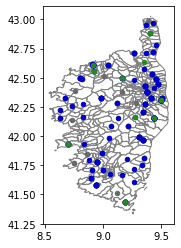

In [92]:
fig, ax = plt.subplots()
data_borders.loc[data_borders['dep'].isin(['2A', '2B'])].plot(ax=ax, color='white', edgecolor='0.5')
patrimoine_culturel.loc[patrimoine_culturel['categorie'].isin(['Monuments historiques','Musées'])].plot(ax = ax, color = 'dimgray', markersize = 20)
patrimoine_culturel.loc[patrimoine_culturel['categorie'].isin(['Villes et Villages remarquables'])].plot(ax = ax, color = 'mediumblue', markersize = 20)
patrimoine_culturel.loc[patrimoine_culturel['categorie'].isin(['Parcs et jardins'])].plot(ax = ax, color = 'forestgreen', markersize = 20)
plt.show()

In [93]:
patrimoine_naturel = gpd.read_file('https://www.data.gouv.fr/fr/datasets/r/efcecbbc-0ea3-4327-b8ff-07d78af0fe55')

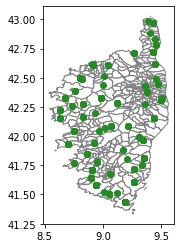

In [97]:
fig, ax = plt.subplots()
data_borders.loc[data_borders['dep'].isin(['2A', '2B'])].plot(ax=ax, color='white', edgecolor='0.5')
patrimoine_naturel.plot(ax = ax, color = 'forestgreen')
plt.show()

Les cartes commencent à beaucoup se ressembler hein ^^

## On peut superposer plusieurs bases de données pour des résultats plus funs

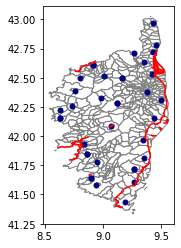

In [64]:
fig, ax = plt.subplots()
data_borders.loc[data_borders['dep'].isin(['2A', '2B'])].plot(ax=ax, color='white', edgecolor='0.5')
offices_de_tourisme.plot(ax = ax, color = 'navy', markersize = 25)
pistes_cyclables.plot(ax=ax, color='red', markersize=5)
plt.show()